In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.precision',4)
pd.set_option('display.max_rows',10)

In [2]:
QTdata = pd.read_excel('DaPy_data.xlsx','QTdata',index_col=0)
QTdata.head(8)

,GDP
YQ,
2001Q1,2.330
2001Q2,2.565
2001Q3,2.687
2001Q4,3.384
2002Q1,2.536
2002Q2,2.797
2002Q3,2.972
2002Q4,3.728


<Axes: xlabel='YQ'>

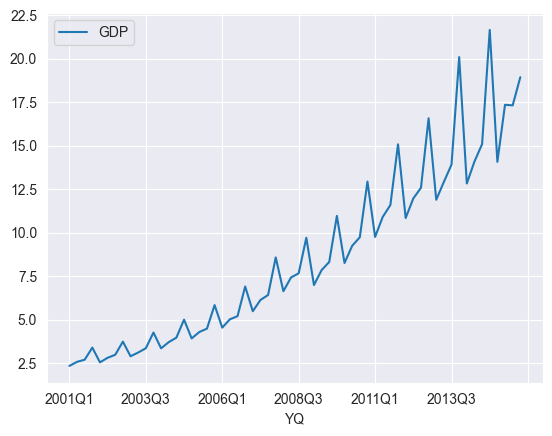

In [3]:
QTdata.plot()

In [4]:
QTdata['Year']=QTdata.index.str[:4];QTdata

,GDP,Year
YQ,,
2001Q1,2.330,2001
2001Q2,2.565,2001
2001Q3,2.687,2001
2001Q4,3.384,2001
2002Q1,2.536,2002
...,...,...
2014Q4,21.656,2014
2015Q1,14.067,2015
2015Q2,17.351,2015


In [5]:
YGDP=QTdata.groupby(['Year'])['GDP'].sum();YGDP

Year
2001    10.966
2002    12.033
2003    13.582
2004    15.988
2005    18.494
         ...  
2011    47.311
2012    51.947
2013    58.802
2014    63.646
2015    67.671
Name: GDP, Length: 15, dtype: float64

<Axes: xlabel='Year'>

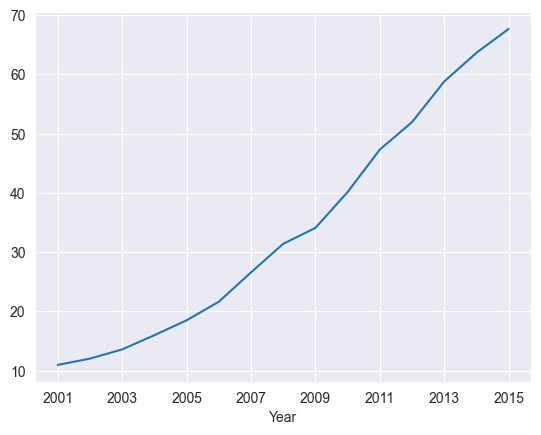

In [6]:
YGDP.plot(grid ='True')

In [7]:
YGDPds=pd.DataFrame(YGDP)
YGDPds['定基数']= YGDP- YGDP[:1].values
YGDPds

,GDP,定基数
Year,,
2001,10.966,0.000
2002,12.033,1.067
2003,13.582,2.616
2004,15.988,5.022
2005,18.494,7.528
...,...,...
2011,47.311,36.345
2012,51.947,40.981
2013,58.802,47.836


In [8]:
YGDPds['环基数']=YGDP- YGDP.shift(1);YGDPds

,GDP,定基数,环基数
Year,,,
2001,10.966,0.000,NaN
2002,12.033,1.067,1.067
2003,13.582,2.616,1.549
2004,15.988,5.022,2.406
2005,18.494,7.528,2.506
...,...,...,...
2011,47.311,36.345,7.160
2012,51.947,40.981,4.636
2013,58.802,47.836,6.855


In [9]:
QGDP=QTdata.GDP
QGDPds=pd.DataFrame({'GDP':QGDP})
QGDPds['同比数']=QGDP-QGDP.shift(4);QGDPds

,GDP,同比数
YQ,,
2001Q1,2.330,NaN
2001Q2,2.565,NaN
2001Q3,2.687,NaN
2001Q4,3.384,NaN
2002Q1,2.536,0.206
...,...,...
2014Q4,21.656,1.564
2015Q1,14.067,1.246
2015Q2,17.351,3.268


In [10]:
YGDPds['定基比']=YGDP/YGDP[:1].values;YGDPds

,GDP,定基数,环基数,定基比
Year,,,,
2001,10.966,0.000,NaN,1.0000
2002,12.033,1.067,1.067,1.0973
2003,13.582,2.616,1.549,1.2386
2004,15.988,5.022,2.406,1.4580
2005,18.494,7.528,2.506,1.6865
...,...,...,...,...
2011,47.311,36.345,7.160,4.3143
2012,51.947,40.981,4.636,4.7371
2013,58.802,47.836,6.855,5.3622


In [11]:
QGDPds['同基比']=(QGDP/QGDP.shift(4)-1)*100;QGDPds

,GDP,同比数,同基比
YQ,,,
2001Q1,2.330,NaN,NaN
2001Q2,2.565,NaN,NaN
2001Q3,2.687,NaN,NaN
2001Q4,3.384,NaN,NaN
2002Q1,2.536,0.206,8.8412
...,...,...,...
2014Q4,21.656,1.564,7.7842
2015Q1,14.067,1.246,9.7184
2015Q2,17.351,3.268,23.2053


In [12]:
n=1/len(YGDP)
ADR=(YGDP[-1:].values/YGDP[:1].values)**n
print(f'\n\t平均增长量 ={ADR.item():5.3f}%')


	平均增长量 =1.129%


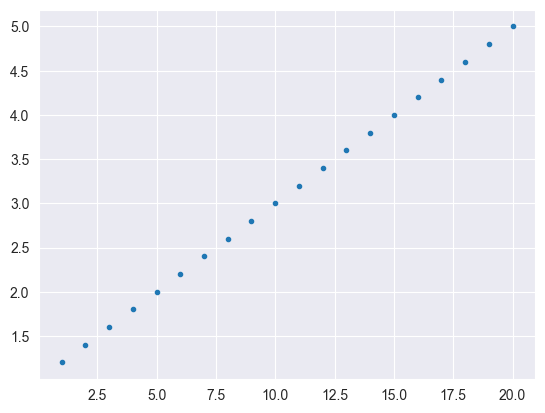

In [13]:
x = np.arange(20) + 1
plt.plot(x,1+0.2*x,'.')

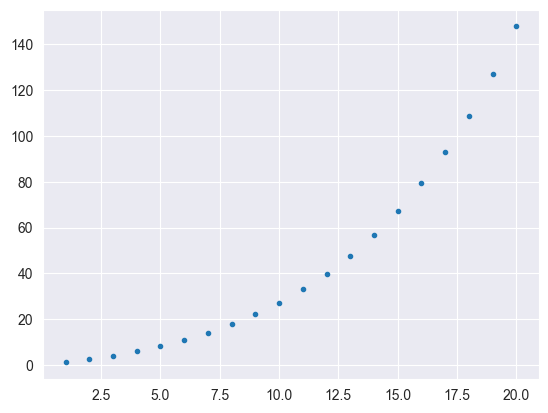

In [14]:
plt.plot(x,x*np.exp(0.1*x),'.')

In [15]:
QT = QTdata.GDP
QT.mean()

np.float64(8.571633333333333)

In [16]:
QtM = pd.DataFrame(QT)
QtM['M2'] = QT.rolling(20).mean()

In [17]:
!pip install pydataset


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     --------------------------------------- 0.1/15.9 MB 656.4 kB/s eta 0:00:25
      --------------------------------------- 0.2/15.9 MB 1.4 MB/s eta 0:00:12
      --------------------------------------- 0.2/15.9 MB 1.7 MB/s eta 0:00:10
      --------------------------------------- 0.2/15.9 MB 1.7 MB/s eta 0:00:10
      --------------------------------------- 0.2/15.9 MB 1.7 MB/s eta 0:00:10
     - -------------------------------------- 0.5/15.9 MB 1.6 MB/s eta 0:00:10
     -- ------------------------------------- 0.8/15.9 MB 2.3 MB/s eta 0:00:07
     -- ------------------------------------- 1.1/15.9 MB 2.8 MB/s eta 0:00:06
     --- ------------------------------------ 1.5/15.9 MB 3.3 MB/s eta 0:00:05
     ---- ----------------------------------- 1.9/15.9 MB 3.8 MB/s eta 0:00:04
     ----- ---------------------------------- 2.3/15.9 MB 4.2 MB

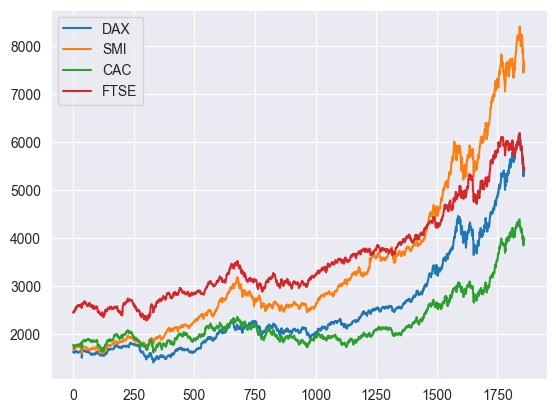

In [11]:
import numpy as np
EuStock = pd.read_csv('EuStockMarkets.csv',index_col=0)
EuStock.plot();

In [18]:
import statsmodels.api as sm
def trendmodel(y,x):
    fm=sm.OLS(y,sm.add_constant(x)).fit()
    sfm=fm.summary2()
    print("模型检验:\n",sfm.tables[1])
    print("决定系数:",sfm.tables[0][1][6])
    return fm.fittedvalues

In [15]:
QtMEu1 = pd.DataFrame(EuStock.DAX)
QtMEu1['DAXM2'] = EuStock.DAX.rolling(3).mean()
QtMEu1['DAXM4'] = EuStock.DAX.rolling(5).mean()
QtMEu1['SMI'] = EuStock.SMI
QtMEu1['SMIM2'] = EuStock.SMI.rolling(3).mean()
QtMEu1['SMIM4'] = EuStock.SMI.rolling(5).mean()
QtMEu1['CAC'] = EuStock.CAC
QtMEu1['CACM2'] = EuStock.CAC.rolling(3).mean()
QtMEu1['CACM4'] = EuStock.CAC.rolling(5).mean()
QtMEu1['FTSE'] = EuStock.FTSE
QtMEu1['FTSEM2'] = EuStock.FTSE.rolling(3).mean()
QtMEu1['FTSEM4'] = EuStock.FTSE.rolling(5).mean();QtMEu1

,DAX,DAXM2,DAXM4,SMI,SMIM2,SMIM4,CAC,CACM2,CACM4,FTSE,FTSEM2,FTSEM4
1,1628.75,NaN,NaN,1678.1,NaN,NaN,1772.8,NaN,NaN,2443.6,NaN,NaN
2,1613.63,NaN,NaN,1688.5,NaN,NaN,1750.5,NaN,NaN,2460.2,NaN,NaN
3,1606.51,1616.296667,NaN,1678.6,1681.733333,NaN,1718.0,1747.100000,NaN,2448.2,2450.666667,NaN
4,1621.04,1613.726667,NaN,1684.1,1683.733333,NaN,1708.1,1725.533333,NaN,2470.4,2459.600000,NaN
5,1618.16,1615.236667,1617.618,1686.6,1683.100000,1683.18,1723.1,1716.400000,1734.50,2484.7,2467.766667,2461.42
...,...,...,...,...,...,...,...,...,...,...,...,...
1856,5460.43,5528.956667,5584.068,7721.3,7840.133333,7926.76,3939.5,3983.333333,3994.86,5587.6,5620.700000,5646.14
1857,5285.78,5448.176667,5497.484,7447.9,7707.366667,7782.30,3846.0,3942.466667,3954.48,5432.8,5566.933333,5585.48
1858,5386.94,5377.716667,5451.918,7607.5,7592.233333,7715.16,3945.7,3910.400000,3948.34,5462.2,5494.200000,5551.42
1859,5355.03,5342.583333,5417.300,7552.6,7536.000000,7656.44,3951.7,3914.466667,3944.96,5399.5,5431.500000,5512.50


模型检验:
           Coef.  Std.Err.            t  P>|t|    [0.025    0.975]
const  7.183568  0.006567  1093.816164    0.0  7.170688  7.196449
x1     0.000623  0.000006   101.884424    0.0  0.000611  0.000635
决定系数: 0.848


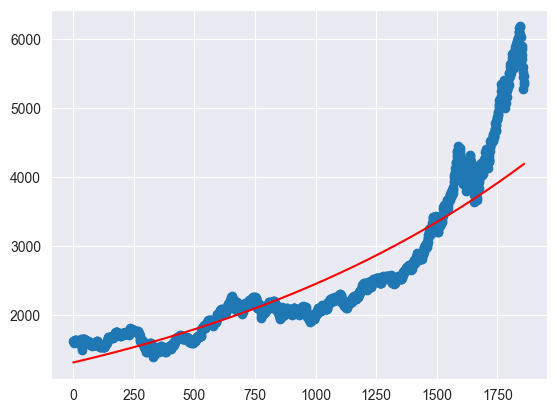

In [16]:
XE = np.arange(len(EuStock))+1
LD = trendmodel(np.log(EuStock.DAX),XE)
plt.plot(EuStock.DAX,'o',np.exp(LD),'r-');

模型检验:
           Coef.  Std.Err.            t  P>|t|    [0.025    0.975]
const  7.300745  0.005777  1263.722456    0.0  7.289414  7.312075
x1     0.000776  0.000005   144.313308    0.0  0.000766  0.000787
决定系数: 0.918


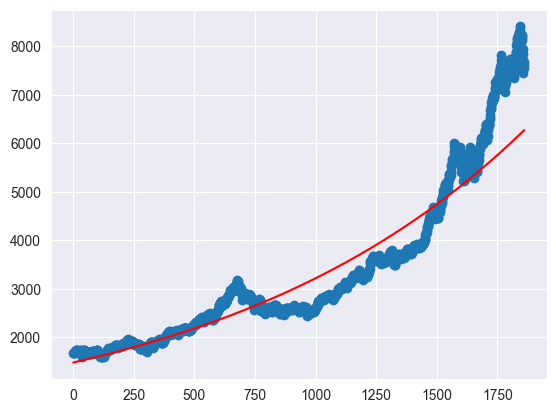

In [17]:
LS = trendmodel(np.log(EuStock.SMI),XE)
plt.plot(EuStock.SMI,'o',np.exp(LS),'r-');